# **Carga de las Librerías**

In [ ]:
import numpy as np
import pandas as pd
import random

import matplotlib.pyplot as plt
from matplotlib import ticker

# **Ejemplo de Generación de Datos**

Se presentan las líneas de código con la generación de una serie de tiempo evaluando toda la curva logística. En la gráfica final se podrá apreciar la curva definida por la ecuación y los valores obtenidos luego de aplicar el coeficiente de variabilidad.

<Figure size 9600x6000 with 0 Axes>

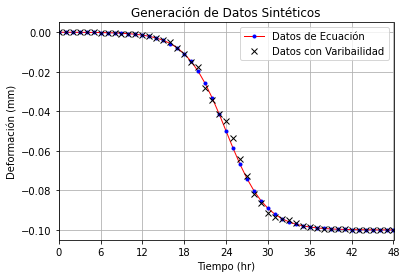

In [ ]:
xmin = 0
xmax = 48
L = 0.1
t0 = 24
k = 0.35
t = np.linspace(xmin,xmax,xmax-xmin+1)
P_var = 0.25
var = 1+np.random.uniform(-P_var,P_var,len(t))

d = (L / (1. + np.exp(-k * (t - t0))*var))*-1
d_ = L / (1. + np.exp(-k * (t - t0)))*-1


plt.figure(figsize=(16,10),dpi=600)

fig, ax = plt.subplots()

ax.set(title='Generación de Datos Sintéticos', ylabel = 'Deformación (mm)', xlabel = 'Tiempo (hr)')
ax.plot(t, d_, 'r-', label = 'Datos de Ecuación', linewidth= 1, marker = '.', markerfacecolor='b', markeredgecolor= 'b', markersize=6 )
ax.plot(t, d,'kx', label = 'Datos con Varibailidad')
plt.xlim(0,48)
plt.xticks(range(0, 49, 6))

ax.legend(loc='best')
ax.grid()

plt.savefig('Figura 1.pdf',dpi=600)

Se presenta solo el tramo de la curva que se utilizaría para en la elaboración del modelo, concerniente a los datos generados entre las horas 12 y 24, los cuales corresponden además al segmento de la curva donde la deformación tendría mayor tasa de cambio. 

<Figure size 9600x2400 with 0 Axes>

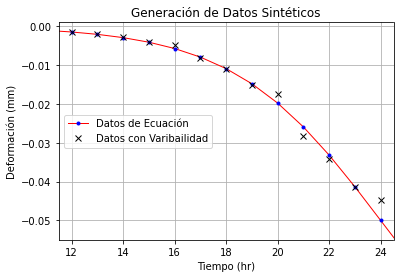

In [ ]:
plt.figure(figsize=(16,4),dpi=600)

fig, ax = plt.subplots()

ax.set(title='Generación de Datos Sintéticos', ylabel = 'Deformación (mm)', xlabel = 'Tiempo (hr)')
ax.plot(t, d_, 'r-', label = 'Datos de Ecuación', linewidth= 1, marker = '.', markerfacecolor='b', markeredgecolor= 'b', markersize=6 )
ax.plot(t, d,'kx', label = 'Datos con Varibailidad')
plt.xlim(11.5,24.5)
plt.ylim(-0.055,0.001)
plt.xticks(range(12, 25, 2))

ax.legend(loc='center left')
ax.grid()
plt.savefig('Figura 2.pdf',dpi=600)

# **Generación de Series de Datos Umbrales**

Los datos umbrales son las series que separan un nivel de alerta del otro, dado que se implementaron 4 niveles de alerta (Alerta Verde, Alerta Amarilla, Alerta Naranja y Alerta Roja) se requieren 3 series umbrales, los cuales corresponderían a pronósticos de falla de 21, 15 y 8 días según el criterio de falla del inverso de la velocidad. Los parámetros de la ecuación para que el pronostico de falla se de en la cantidad de días señalados son:

  Umbral 1: L =0.1; k= 0.02560; Umbral 2: L =0.5; k= 0.03024; Umbral 3: L =1.0; k= 0.04117

El valor de los parámetros t0 y var, se mantendrán idénticos para todas las series y serán correspondientes a 24 y 0.05 respectivamente, de igual manera se mantendrá el eje X para los tiempos entre 12 y 24 horas.

In [ ]:
Umbral_1 =[]
Umbral_2 =[]
Umbral_3 =[]

xmin = 12
xmax = 24

t = np.linspace(xmin,xmax,xmax-xmin+1)

t0 = 24

P_var = 0.05
var = 1+np.random.uniform(-P_var,P_var,len(t))

def DeformacionConVariabilidad(L,k):
  return (t-12), (-L / (1. + np.exp(-k * (t - t0))))

MiDefConVar=DeformacionConVariabilidad(0.1, 0.02560)
Umbral_1.append([MiDefConVar[1]])

MiDefConVar=DeformacionConVariabilidad(0.5, 0.03024)
Umbral_2.append([MiDefConVar[1]])

MiDefConVar=DeformacionConVariabilidad(1.0, 0.04117)
Umbral_3.append([MiDefConVar[1]])

Teniendo los valores umbrales y sus parámetros, se podrán generar series de datos entre las series umbrales, las cuales corresponderían a las series de los niveles de alertas para el entrenamiento del modelo.

Para la generación de los datos para el entrenamiento del modelo bastaría crear listas de datos mediante iteraciones, especificando que los parámetros de cada serie que se genere, se obtenga de manera aleatoria entre un rango de valores limitado por los parámetros que generan las series umbrales. Lo anterior se ilustrará a continuación visualizando 5 series por nivel de alerta. 


<Figure size 3000x2000 with 0 Axes>

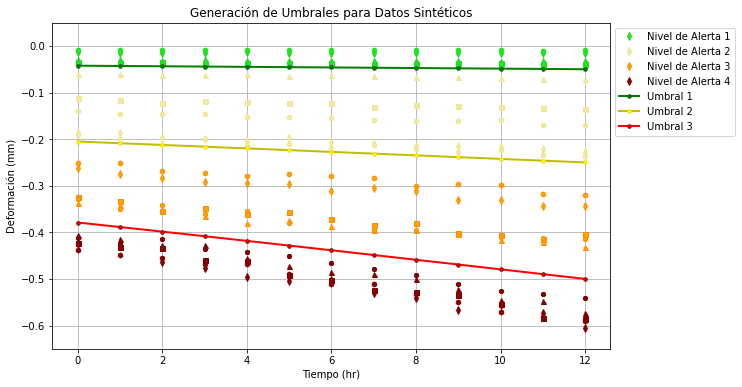

In [ ]:
plt.figure(dpi=500)
fig, ax = plt.subplots()
fig.set_size_inches(10, 6)

ax.set(title='Generación de Umbrales para Datos Sintéticos', ylabel = 'Deformación (mm)', xlabel = 'Tiempo (hr)')

#Alerta 1

Alert_1 = []

for i in range(5):
  L = random.uniform(0.01000, 0.10000)
  k = random.uniform(0.01000, 0.0256)
  
  P_var = 0.05
  var = 1+np.random.uniform(-P_var,P_var,len(t))

  def DeformacionConVariabilidad(t0):
    return (t-12), (L / (1. + np.exp(-k * (t - t0))*var)*-1)
  
  MiDefConVar=DeformacionConVariabilidad(24)
  Alert_1.append([MiDefConVar[1]])
  
ax.plot(MiDefConVar[0], Alert_1[0][0],"d", color = 'lime', markersize=5, markeredgecolor = 'limegreen' , label = 'Nivel de Alerta 1',)
ax.plot(MiDefConVar[0], Alert_1[1][0],"^", color = 'lime', markersize=5, markeredgecolor = 'limegreen')
ax.plot(MiDefConVar[0], Alert_1[2][0],"s", color = 'lime', markersize=5, markeredgecolor = 'limegreen')
ax.plot(MiDefConVar[0], Alert_1[3][0],"8", color = 'lime', markersize=5, markeredgecolor = 'limegreen')
ax.plot(MiDefConVar[0], Alert_1[4][0],"h", color = 'lime', markersize=5, markeredgecolor = 'limegreen')

#Alerta 2

Alert_2 = []

for i in range(5):
  L = random.uniform(0.10001, 0.50000)
  k = random.uniform(0.02560, 0.03024)
  
  P_var = 0.05
  var = 1+np.random.uniform(-P_var,P_var,len(t))

  def DeformacionConVariabilidad(t0):
    return (t-12), (L / (1. + np.exp(-k * (t - t0))*var)*-1)
  
  MiDefConVar=DeformacionConVariabilidad(24)
  Alert_2.append([MiDefConVar[1]])
  
ax.plot(MiDefConVar[0], Alert_2[0][0], "d", color = 'palegoldenrod', markersize=5, markeredgecolor = 'khaki', label = 'Nivel de Alerta 2')
ax.plot(MiDefConVar[0], Alert_2[1][0], "^", color = 'palegoldenrod', markersize=5, markeredgecolor = 'khaki')
ax.plot(MiDefConVar[0], Alert_2[2][0], "s", color = 'palegoldenrod', markersize=5, markeredgecolor = 'khaki')
ax.plot(MiDefConVar[0], Alert_2[3][0], "8", color = 'palegoldenrod', markersize=5, markeredgecolor = 'khaki')
ax.plot(MiDefConVar[0], Alert_2[4][0], "h", color = 'palegoldenrod', markersize=5, markeredgecolor = 'khaki')

#Alerta 3

Alert_3 = []

for i in range(5):
  L = random.uniform(0.50001, 1.00000)
  k = random.uniform(0.03024, 0.04117)
  
  P_var = 0.05
  var = 1+np.random.uniform(-P_var,P_var,len(t))

  def DeformacionConVariabilidad(t0):
    return (t-12), (L / (1. + np.exp(-k * (t - t0))*var)*-1)
  
  MiDefConVar=DeformacionConVariabilidad(24)
  Alert_3.append([MiDefConVar[1]])
  
ax.plot(MiDefConVar[0], Alert_3[0][0], "d", color = 'orange', markersize=5, markeredgecolor = 'darkorange', label = 'Nivel de Alerta 3')
ax.plot(MiDefConVar[0], Alert_3[1][0], "^", color = 'orange', markersize=5, markeredgecolor = 'darkorange')
ax.plot(MiDefConVar[0], Alert_3[2][0], "s", color = 'orange', markersize=5, markeredgecolor = 'darkorange')
ax.plot(MiDefConVar[0], Alert_3[3][0], "8", color = 'orange', markersize=5, markeredgecolor = 'darkorange')
ax.plot(MiDefConVar[0], Alert_3[4][0], "h", color = 'orange', markersize=5, markeredgecolor = 'darkorange')

#Alerta 4

Alert_4 = []

for i in range(5):  
  L = random.uniform(1.0500, 1.20000)
  k = random.uniform(0.04118, 0.05265)
  P_var = 0.05
  var = 1+np.random.uniform(-P_var,P_var,len(t))

  def DeformacionConVariabilidad(t0):
    return (t-12), (L / (1. + np.exp(-k * (t - t0))*var)*-1)
  
  MiDefConVar=DeformacionConVariabilidad(24)
  Alert_4.append([MiDefConVar[1]])
  
ax.plot(MiDefConVar[0], Alert_4[0][0], "d", color = 'darkred', markersize=5, markeredgecolor = 'maroon', label = 'Nivel de Alerta 4')
ax.plot(MiDefConVar[0], Alert_4[1][0], "^", color = 'darkred', markersize=5, markeredgecolor = 'maroon')
ax.plot(MiDefConVar[0], Alert_4[2][0], "s", color = 'darkred', markersize=5, markeredgecolor = 'maroon')
ax.plot(MiDefConVar[0], Alert_4[3][0], "8", color = 'darkred', markersize=5, markeredgecolor = 'maroon')
ax.plot(MiDefConVar[0], Alert_4[4][0], "h", color = 'darkred', markersize=5, markeredgecolor = 'maroon')


ax.set(title='Generación de Umbrales para Datos Sintéticos', ylabel = 'Deformación (mm)', xlabel = 'Tiempo (hr)')
ax.plot(MiDefConVar[0], Umbral_1[0][0], 'g-', label = 'Umbral 1', linewidth= 2, marker = '.', markerfacecolor='green', markeredgecolor= 'darkgreen', markersize=7 )
ax.plot(MiDefConVar[0], Umbral_2[0][0], 'y-', label = 'Umbral 2', linewidth= 2, marker = '.', markerfacecolor='yellow', markeredgecolor= 'gold', markersize=7 )
ax.plot(MiDefConVar[0], Umbral_3[0][0], 'r-', label = 'Umbral 3', linewidth= 2, marker = '.', markerfacecolor='red', markeredgecolor= 'darkred', markersize=7 )

#plt.xlim(11.5,24.5)
plt.ylim(-0.65,0.05)
#plt.xticks(range(12, 25, 2))

ax.legend(bbox_to_anchor=(1.0, 1))
ax.grid()

# **Generación de Datos para Entrenamiento**

In [37]:
xmin = 12
xmax = 24
t = np.linspace(xmin,xmax,xmax-xmin+1)
P_var = 0.05
var = 1+np.random.uniform(-P_var,P_var,len(t))

Nivel_Alerta_1_Verde = []

for i in range(1000):

  L = random.uniform(0.01000, 0.10000)
  k = random.uniform(0.01000, 0.0256)

  def DeformacionConVariabilidad(t0):
    return (t-12), (L / (1. + np.exp(-k * (t - t0))*var)*-1)
  
  MiDefConVar=DeformacionConVariabilidad(24)
  Nivel_Alerta_1_Verde.append([MiDefConVar[1]])


Nivel_Alerta_2_Amarillo = []

for i in range(1000):

  L = random.uniform(0.10001, 0.50000)
  k = random.uniform(0.02560, 0.03024)
  
  def DeformacionConVariabilidad(t0):
    return (t-12), (L / (1. + np.exp(-k * (t - t0))*var)*-1)
  
  MiDefConVar=DeformacionConVariabilidad(24)
  Nivel_Alerta_2_Amarillo.append([MiDefConVar[1]])


Nivel_Alerta_3_Naranja = []

for i in range(1000):

  L = random.uniform(0.50001, 1.00000)
  k = random.uniform(0.03024, 0.04117)
  
  def DeformacionConVariabilidad(t0):
    return (t-12), (L / (1. + np.exp(-k * (t - t0))*var)*-1)
  
  MiDefConVar=DeformacionConVariabilidad(24)
  Nivel_Alerta_3_Naranja.append([MiDefConVar[1]])


Nivel_Alerta_4_Roja = []

for i in range(1000):

  L = random.uniform(1.0500, 1.20000)
  k = random.uniform(0.04118, 0.05265)
  
  def DeformacionConVariabilidad(t0):
    return (t-12), (L / (1. + np.exp(-k * (t - t0))*var)*-1)
  
  MiDefConVar=DeformacionConVariabilidad(24)
  Nivel_Alerta_4_Roja.append([MiDefConVar[1]])

In [43]:
  d_Al1 = pd.DataFrame(np.concatenate(Nivel_Alerta_1_Verde))
  d_Al1 = d_Al1.assign(Target='Alerta_1')

  d_Al2 = pd.DataFrame(np.concatenate(Nivel_Alerta_2_Amarillo))
  d_Al2 = d_Al2.assign(Target='Alerta_2')

  d_Al3 = pd.DataFrame(np.concatenate(Nivel_Alerta_3_Naranja))
  d_Al3 = d_Al3.assign(Target='Alerta_3')

  d_Al4 = pd.DataFrame(np.concatenate(Nivel_Alerta_4_Roja))
  d_Al4 = d_Al4.assign(Target='Alerta_4')  

  Data = pd.concat([d_Al1, d_Al2, d_Al3, d_Al4], axis=0)
  Data=Data.sample(frac=1).reset_index(drop=True)

Data.to_csv('Dataset.csv', index=False)